In [4]:
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

In [49]:
dados = yf.download('^BVSP', period='max', interval='1D')

[*********************100%***********************]  1 of 1 completed


In [51]:
dados['mm20'] = dados['Close'].rolling(20).mean()

In [52]:
dados['acima_media'] = dados['Low'] > dados['mm20']

In [53]:
dados['abaixo_media'] = dados['High'] < dados['mm20']

In [54]:
dados['toca_media'] = (dados['acima_media'] == False) & (dados['abaixo_media'] == False)

### Testar candles acima da media

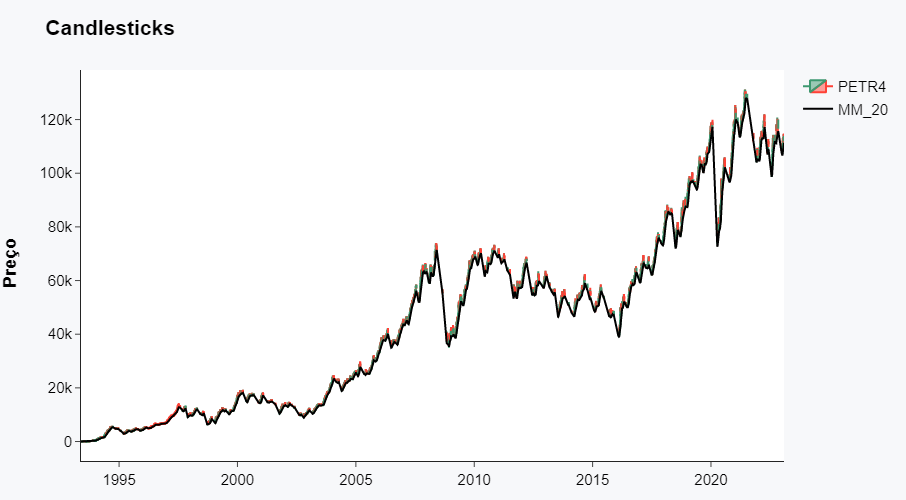

In [56]:
df_figure = dados.loc[dados['acima_media'] == True]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Candlestick(name='PETR4', x=df_figure.index, open=df_figure['Open'], high = df_figure['High'], 
                             low=df_figure['Low'], close=df_figure['Close']), row=1,col=1)

fig.add_trace(go.Scatter(name='MM_20', x=df_figure.index, y=df_figure['mm20'], marker_color='black'), row=1, col=1)


#fig.update_xaxes(title_text="<b> Data",rangebreaks=[dict(bounds=["sat", "mon"])])
fig.update_layout(xaxis_rangeslider_visible=False, title_text='<b>Candlesticks', 
                  yaxis1_title="<b> Preço",
                  font=dict(family="Arial", size=15, color="black"), margin=dict(l=50, r=20, t=70, b=20),
                  template = 'simple_white', paper_bgcolor="#f7f8fa",
                  width=800, height=500)
fig.show()

### Testar candles abaixo da media

In [57]:
df_figure = dados.loc[dados['abaixo_media'] == True]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Candlestick(name='PETR4', x=df_figure.index, open=df_figure['Open'], high = df_figure['High'], 
                             low=df_figure['Low'], close=df_figure['Close']), row=1,col=1)

fig.add_trace(go.Scatter(name='MM_20', x=df_figure.index, y=df_figure['mm20'], marker_color='black'), row=1, col=1)


#fig.update_xaxes(title_text="<b> Data",rangebreaks=[dict(bounds=["sat", "mon"])])
fig.update_layout(xaxis_rangeslider_visible=False, title_text='<b>Candlesticks', 
                  yaxis1_title="<b> Preço",
                  font=dict(family="Arial", size=15, color="black"), margin=dict(l=50, r=20, t=70, b=20),
                  template = 'simple_white', paper_bgcolor="#f7f8fa",
                  width=800, height=500)
fig.show()

### Testar candles que tocam na media

In [58]:
df_figure = dados.loc[dados['toca_media'] == True]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Candlestick(name='PETR4', x=df_figure.index, open=df_figure['Open'], high = df_figure['High'], 
                             low=df_figure['Low'], close=df_figure['Close']), row=1,col=1)

fig.add_trace(go.Scatter(name='MM_20', x=df_figure.index, y=df_figure['mm20'], marker_color='black'), row=1, col=1)


#fig.update_xaxes(title_text="<b> Data",rangebreaks=[dict(bounds=["sat", "mon"])])
fig.update_layout(xaxis_rangeslider_visible=False, title_text='<b>Candlesticks', 
                  yaxis1_title="<b> Preço",
                  font=dict(family="Arial", size=15, color="black"), margin=dict(l=50, r=20, t=70, b=20),
                  template = 'simple_white', paper_bgcolor="#f7f8fa",
                  width=800, height=500)
fig.show()

### Dados acima media

In [59]:
dados_acima_media = dados.loc[dados['acima_media']==True]

In [60]:
dados_acima_media = dados_acima_media.drop(['acima_media', 'abaixo_media', 'toca_media', 'Volume', 'Adj Close'], axis = 1)

In [61]:
dados_acima_media['candle_positivo'] = dados_acima_media['Close'] >dados_acima_media['Open']

In [62]:
dados_acima_media['candle_negativo_neutro'] = dados_acima_media['Close'] <= dados_acima_media['Open']

In [63]:
dados_acima_media['candle_positivo'] = dados_acima_media['candle_positivo'].astype(int)

In [64]:
dados_acima_media['candle_negativo_neutro'] = dados_acima_media['candle_negativo_neutro'].astype(int)

In [66]:
candles_positivo_acima_media = dados_acima_media['candle_positivo'].sum()
candles_positivo_acima_media

2024

In [67]:
total_candles_acima_media = dados_acima_media['candle_positivo'].count()
total_candles_acima_media

3638

In [68]:
percentual_candles_positivos_acima_media = (candles_positivo_acima_media/total_candles_acima_media) * 100
percentual_candles_positivos_acima_media

55.63496426608027

### Dados abaixo media

In [69]:
dados_abaixo_media = dados.loc[dados['abaixo_media']==True]

In [70]:
dados_abaixo_media = dados_abaixo_media.drop(['acima_media', 'abaixo_media', 'toca_media', 'Volume', 'Adj Close'], axis = 1)

In [71]:
dados_abaixo_media['candle_positivo'] = dados_abaixo_media['Close'] >dados_abaixo_media['Open']

In [72]:
dados_abaixo_media['candle_negativo_neutro'] = dados_abaixo_media['Close'] <= dados_abaixo_media['Open']

In [73]:
dados_abaixo_media['candle_positivo'] = dados_abaixo_media['candle_positivo'].astype(int)

In [74]:
dados_abaixo_media['candle_negativo_neutro'] = dados_abaixo_media['candle_negativo_neutro'].astype(int)

In [76]:
candles_positivo_abaixo_media = dados_abaixo_media['candle_positivo'].sum()
candles_positivo_abaixo_media

1000

In [77]:
total_candles_abaixo_media = dados_abaixo_media['candle_positivo'].count()
total_candles_abaixo_media

2344

In [78]:
percentual_candles_positivos_abaixo_media = (candles_positivo_abaixo_media/total_candles_abaixo_media) * 100
percentual_candles_positivos_abaixo_media

42.66211604095563